In [1]:
import datajoint as dj
import pandas as pd
import pyrfume
from pyrfume import datajoint_tools as djt
from pyrfume import init_config, write_config, read_config
from pyrfume.dbtables import get_tables, drop_schema, init_schema

DataJoint verified plugin `datajoint_connection_hub` detected.


In [2]:
dj.config['database.host'] = 'hub://djhub.io/iconlab/osmonauts'
dj.config['database.user'] = "zhiwei"  # Message Rick Gerkin on Slack to get one
dj.config['database.password'] = "75987502Dat"  # Ditto, then change it
dj.config["enable_python_native_blobs"] = True
#dj.config.save_local()

In [3]:
init_config(True)
write_config("DATABASE", "schema_name", "u_zhiwei_odorants")
init_schema()
drop_schema(True)
locals().update(get_tables())

Connecting zhiwei@djhub-hosting-asu-001.cda95qzjbnvs.us-east-1.rds.amazonaws.com:3306


In [4]:
line = "__________________________________________________________"
print(line)
print(Molecule.definition)
print(line)
print(Vendor.definition)
print(line)
print(Product.definition)
print(line)
print(Compound.definition)
print(line)
print(Solution.definition)
print(line)
print(Solution.Compounds.definition)
print(line)
print(Vessel.definition)
print(line)
print(Odorant.definition)
print(line)
print(Odorant.Solutions.definition)
print(line)
print(Route.definition)
print(line)
print(Stimulus.definition)
print(line)
print(Stimulus.Odorants.definition)
print(line)
print(Subject.definition)
print(line)
print(Trial.definition)
print(line)
print(Site.definition)
print(line)
print(Investigator.definition)
print(line)
print(Technician.definition)
print(line)
print(Publication.definition)
print(line)
print(Report.definition)
print(line)
print(Design.definition)
print(line)
print(Block.definition)
print(line)
print(Block.Trials.definition)
print(line)
print(Experiment.definition)
print(line)
print(Experiment.Blocks.definition)
print(line)
print(Summary.definition)
print(line)
print(Summary.Odorants.definition)
print(line)


__________________________________________________________

    smiles : varchar(25)
    ---
    inchi = NULL : varchar(128)
    inchikey = "" : varchar(256)
    pubchem_id = NULL : int
    name = "" : varchar(128)
    iupac = "" : varchar(128)
    
__________________________________________________________

    name = "" : varchar(256)
    ---
    
__________________________________________________________

    -> Vendor 
    catalog = 0 : int
    ---
    -> Molecule
    purity = "" : varchar(64)
    batch = "" : varchar(64)
    
__________________________________________________________

    -> Product
    date_delivered : datetime
    location = "" : varchar(64)
    ---
    date_opened = NULL : datetime
    
__________________________________________________________

    solution_id: int auto_increment
    ---
    diution = NULL : int
    concentration = NULL : float
    value = NULL : <quantity_adapter>
    mixing_data = NULL : date
    
____________________________________________

In [5]:
Molecule.insert1({
    "smiles": "smile 1",
    "inchi": "1S/C2H6O/c1-2-3/h3H,2H2,1H3",
    "inchikey": "LFQSCWFLJHTTHZ-UHFFFAOYSA-N",
    "pubchem_id": 702,
    "name": "ethanol",
    "iupac": "Ethanol",
})

In [6]:
import pandas as pd
mols = pd.DataFrame(Molecule & "name='ethanol'")
print(line)
print(mols)

__________________________________________________________
    smiles                        inchi                     inchikey  \
0  smile 1  1S/C2H6O/c1-2-3/h3H,2H2,1H3  LFQSCWFLJHTTHZ-UHFFFAOYSA-N   

   pubchem_id     name    iupac  
0         702  ethanol  Ethanol  


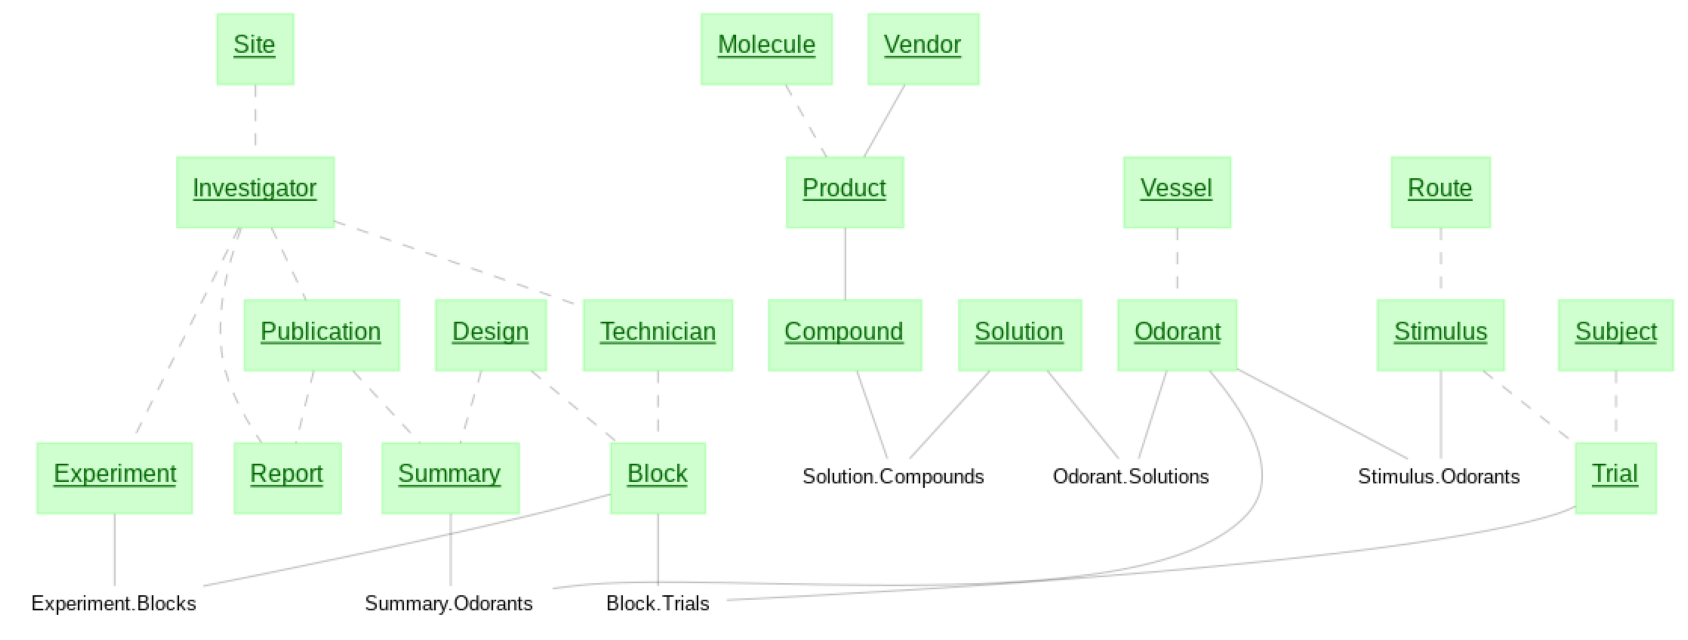

In [13]:
plt.figure(figsize=(30, 30))
dj.ERD(pyrfume.dbtables.schema).draw()
